# Pack Your Suitcase... And A First Aid Kit?
## When natural disasters strike, tourism is often among the first sectors to collapse. Whether and how quickly it recovers depends on more than the disaster itself. Let's take a closer look before we embark on a plane to our next journey!


**Authors:** Vanessa El Khoury, Rayan Gannoun, Daphne Vryghem  
**Date:** December 19, 2025

---

Have you decided where you'd like to spend your vacation this summer? Have you scrolled through your social media looking for a holiday destination yet? If you have, there's a 53% chance you've looked up the weather at your destination while making your choice (Expedia Group Advertising, 2023). But have you considered if you would be met on arrival by an event more severe than off-season rainfall? The thousands of European tourists who lost their lives in the 2004 Boxing Day tsunami in Thailand probably hadn't (Britannica Editors, 2005).

![Tsunami Beach](assets/Beach.jpg)

*Figure 1 - Tourists react as the first of six tsunami rolls towards Hat Rai Lay Beach in southern Thailand (ABC, 2014 from AFP)*

Natural disasters are harder to predict than the weather, and much more dangerous. Yet is that enough for tourists to shy away from destinations affected by such events? And is it worth it for unprepared countries to increase the resilience of their touristic infrastructure to attract more travelers?

In [1]:
# Setup: Import libraries and load data
import sys
!{sys.executable} -m pip install -r requirements.txt -q
!{sys.executable} -m pip install pycountry -q

import warnings
warnings.filterwarnings('ignore')

# Import all necessary modules
from src import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data (silent mode)
df_all, df_low_prep, df_high_prep = load_all_datasets()

# Apply log transformations (silent mode)
df = log_transform_in_place(df_all.copy(), verbose=False)
df_low = log_transform_in_place(df_low_prep.copy(), verbose=False)
df_high = log_transform_in_place(df_high_prep.copy(), verbose=False)

# Display summary with transformed data (200 rows preview, no summary table)
display_data_summary(df, df_low, df_high, preview_rows=200, show_summary=False)

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


country,year,deaths,tourists,wri_v,pop_density,gdp_pc
Andorra,2001,0.00,8.17,1.67,4.94,10.44
Andorra,2002,0.00,8.13,1.76,4.94,10.51
Andorra,2003,0.00,8.05,1.77,4.95,10.55
Andorra,2004,0.00,7.93,1.51,5.00,10.59
Andorra,2005,0.00,7.79,1.52,5.06,10.60
Andorra,2006,0.00,7.71,1.74,5.10,10.61
Andorra,2007,0.00,7.69,1.68,5.13,10.63
Andorra,2008,0.00,7.63,1.67,5.16,10.62
Andorra,2009,0.00,7.51,1.38,5.18,10.54
Andorra,2010,0.00,7.50,1.43,5.18,10.48


---

Natural disasters can have positive or negative effects of varying magnitudes on tourism according to the type of event (Rossello et al., 2020). Similarly, tourists may be attracted or deterred by risks they may encounter at their travel destinations depending on their severity (Jiang et al., 2022) or might not consider them at all (Moreira, 2007 & Law, 2006). 

![Disaster Trend](assets/Tourists_trend.jpg)

*Figure 2 - Increasing trend of natural disasters with time (Shreve, 2025)*

These risks, however, are becoming more dangerous with the rise of natural disasters worldwide (Figure 2), threatening a sector that represents 1 out of 10 jobs in the world and no less than 10% of global GDP (World Travel & Tourism Council, 2024). This combination of the increase in travel risks and the dependency of the global economy on tourism creates an urgent need to study the effect of natural disasters on tourist activity. We embark on a journey to do so while investigating the role of preparedness on this relationship: is prevention an effective tool in protecting tourist activity in vulnerable countries? Let’s fill your suitcase with the essentials to answer this question!

---

![summary](assets/summary.jpg)



---

## Packing Carefully: Data Selection

To understand the impact of natural disasters on tourism, we study the effect of deaths caused by those disasters on the number of overnight tourists visiting the country affected. While Rosselo et al. study this effect on three measures of natural disaster intensity (deaths, damage, and people affected), we posit that the human factor inherent to loss of lives is a stronger influence on tourist decisions. As presented in the media, the death toll of natural disasters is also easier to picture than an account of damages in currency.

The data for deaths by natural disaster per year and country is extracted from the EM-DAT database starting from 2000, as the data is less reliable prior. For international tourist arrivals, we use data published by the United Nations, and for reasons of missing values, we limit our extraction to years prior to 2020, thus excluding the effect of COVID-19. Our period of study is thus between 2000 and 2019.

The relationship between natural disasters and tourism is shaped by multiple factors (Figure 3):
- **GDP per capita (GDP):** measured in constant 2015 US dollars as obtained from the World Bank. The literature suggests that GDP has a confounding effect on the relationship between deaths caused by natural disasters and tourist numbers (Rossello et al., 2020).

- **Population density:** measured per square kilometer as obtained from Our World in Data (HYDE 2023; Gapminder, 2022; UN WPP, 2024; UN FAO, 2024). The more people live in an area affected by a natural disaster, the higher the potential number of disaster-related fatalities. A correlation also exists between overnight tourists and the population density of cities (Weng et al., 2022).

- **Preparedness:** measured by the vulnerability factor of the World Risk Index (see Appendix). The better prepared a country is, the less deaths suffered during an event (Guimarães et al., 2025; Nagayama & Yamada, 2005). At the same time, a country’s preparedness is related to infrastructure that is more or less attractive to tourists (Gavura et al., 2021).

- **Geography:** countries with different geographical features, like beaches, can attract more tourists, but are also exposed to natural disasters such as tsunamis, which creates a confounding effect.

- **Climate:** natural disasters are climate-specific, but climates are also varyingly attractive, creating a confounding effect.

Geography and climate zones are captured by country fixed effects, as defined later, because they do not vary over time. For this reason, they are not included as individual control variables in the model, contrary to GDP, population density, and preparedness. 
As shown in Figure 3, mediators affect tourism only through the deaths caused by natural disasters. They are better not included in the model because they can bias the results. Covariates, on the other hand, only affect the number of tourists independently from the number of deaths, and they can usually bias the precision of results. They are included, in our case, in either country-fixed effects for cultural attractiveness and political shifts, or time-fixed effects for economic shocks such as the 2008 economic crisis.


![DAG](assets/DAG.jpg)

*Figure 3 - Direct Acyclic Graph*

### Limitations
Some characteristics of the data must be mentioned before we proceed further, as they might bias results.
- **Selection bias**: the country sample is not geographically balanced as European countries are heavily overrepresented, while Africa, Latin America, and Oceania receive comparatively limited coverage. Since European destinations tend to exhibit higher levels of disaster preparedness and institutional capacity, the estimated effects may understate the impact of natural disasters on tourism in less developed regions.
- **Non-classical measurement error**: the EM-DAT database, most popularly used in the literature for data on natural events, is plagued with reporting issues, such that some events have missing data. For those events, we considered that they went unreported because they were very small, and hence attributed them a null value of deaths. However, countries with less reporting tend to be those with weaker institutions, more conflicts, and other issues that would hinder reporting but that would also affect tourism. For this reason, our results must be viewed under the lens of this lingering bias. 
- **Reverse causality**: another source of endogeneity is the effect of tourists on the number of deaths. As in the case of the 2004 tsunami in Thailand, the presence of tourists inflated the number of deaths attributed to the natural disaster. This issue is mitigated by lagging the data according to the following section.

### Data treatment

- **Lagging**: because we want to study the effect of natural disasters on future tourist activity, tourist data is lagged by one year; i.e. for an event in 2011, we look at tourist arrivals in 2012. This also mitigates endogeneity due to reverse causality. Similarly, tourist data becomes lagged compared to all other confounding variables such that tourist activity in the year of study has no impact on pre-existing conditions in the destination country. After lagging, our period of study is thus further restricted to 2001-2019.
- **Log transformation**: as suggested by the literature (Rossello et al., 2020), and to reduce skewness, both the dependent and independent variables as well as confounding variables are logged in the rest of this analysis. Our results will thus be in percentage changes, an important distinction.


Our suitcase is now full, but before we board, let’s take a long look at our interactive map so we don’t get lost during the layover. Alongside summary tables, you can recognize prepared countries to purple circles, less prepared countries to red circles, and the number of tourists according to the shaded scale.


In [2]:
# Figure 4 - Tourism, disaster exposure, and preparedness around the world (2001-2019)
fig = create_interactive_disaster_map(df_all, bubble_size=4)
fig.show()

Now that we’ve checked out our map, let’s jump onto our next flight. This one is rockier, so beware of turbulence!

# Do Disasters Scare Tourists Away?

Intuitively, natural disasters seem likely to deter tourists. Severe events disrupt transport, damage infrastructure, and in extreme cases cost lives. Our supposition is that this last factor would have a negative impact on the perception of a destination, repelling tourists from it. Are you thus less likely to go to a country that experienced a disaster the more severe the human losses are? Hold on to your answer as we investigate if indeed you do.
We test our hypothesis by estimating a model linking the variables we have discussed across countries and over time, per the following equation :
```
ln(tourists_{it+1}) = α + β·ln(deaths_{it}+1) + γ'·X_{it} + μ_i + τ_t + ε_{it}
```

Where:
- **α:** y-intercept of the curve, the value of the transformed dependent variable when all other variables are null.

- **β:** the coefficient of the relationship between transformed tourist numbers and death numbers, which will determine the effect of natural disasters on tourism.

- **γ':** a vector of coefficients for the confounding variables, each coefficient representing the effect of these confounding variables on the transformed number of tourists.

- **X(it):** a vector of the confounding variables including preparedness, population density, and GDP, with i representing countries and t years.

- **μ(i):** country-fixed effects that measure a country against itself, a variable that includes country-specific factors such as geography and climate, but also economic shocks specific to the country.

- **τ(t):** time-fixed effects, a variable that captures trends that happen in all countries across the same year, such as global economic shocks that might affect worldwide tourism.

- **ε(it):** an error term that accounts for all the effects on tourism not included explicitly in the model, such as unexpected events, measurement errors, or influences that are difficult to observe or quantify.

With this set-up for our baseline model, we can dive into the regression process.

### What do we find?

We start with a basic model using only the number of deaths and the number of tourists, which yields a positive coefficient of 0.19 (Figure 5). However, the coefficient becomes -0.0061 with the addition of the fixed effects, suggesting a negative relationship. The further addition of the X(it) vector of confounders increases the confounder to -0.0026, a 22% relative increase, but the relationship remains negative.

Figure 6 shows the effect of adding the confounders one by one, proving that they individually have an important effect on the relationship we're studying (see Appendix). The final result suggests that for every percent increase in the number of deaths caused by a natural disaster, 0.0026% less tourists are attracted to the country where that disaster happened.

However, the result remains non-statistically significant, as our confidence interval crosses 0 (Figures 5 and 6). This could be explained by the fact that there is actually no effect between our variables of study, but this is in contrast with the literature, which finds a significant relationship between deaths due to natural disasters and tourist numbers (Rosselo, 2020). As such, the remaining reason would be that our model does not provide sufficient evidence to estimate a relationship, either because of lingering imprecision or insufficient data. 



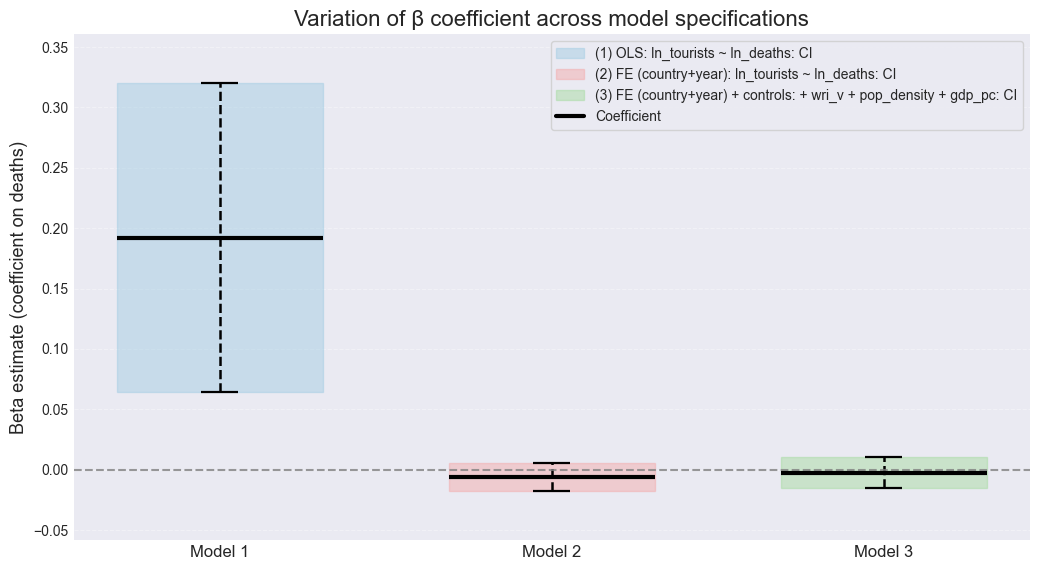

In [3]:
# Figure 5 - Variation of the β coefficient across models
models, model_names = run_baseline_specifications(df)

# Plot beta variation
fig = plot_beta_variation(models, model_names, 'deaths', title="Variation of β coefficient across model specifications")
plt.show()

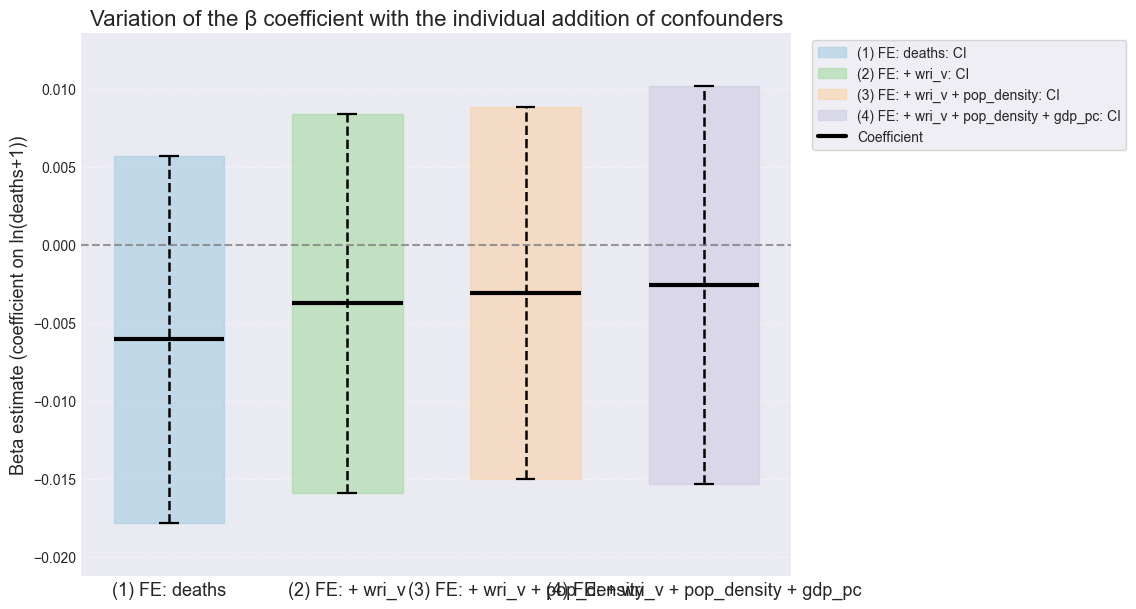

In [4]:
# Figure 6 - Variation of the β coefficient with individual addition of confounders
results_controls = run_control_comparison(df, verbose=False)
fig = plot_beta_comparison(
    results_controls['betas'],
    title="Variation of the β coefficient with the individual addition of confounders"
)
plt.show()

In addition to this, the coefficient of the regression is flat (Figure 7). If anything, this implies that even large proportional increases in disaster-related fatalities are associated with economically small changes in tourism flows, suggesting a limited average sensitivity of tourist decisions to disaster severity.

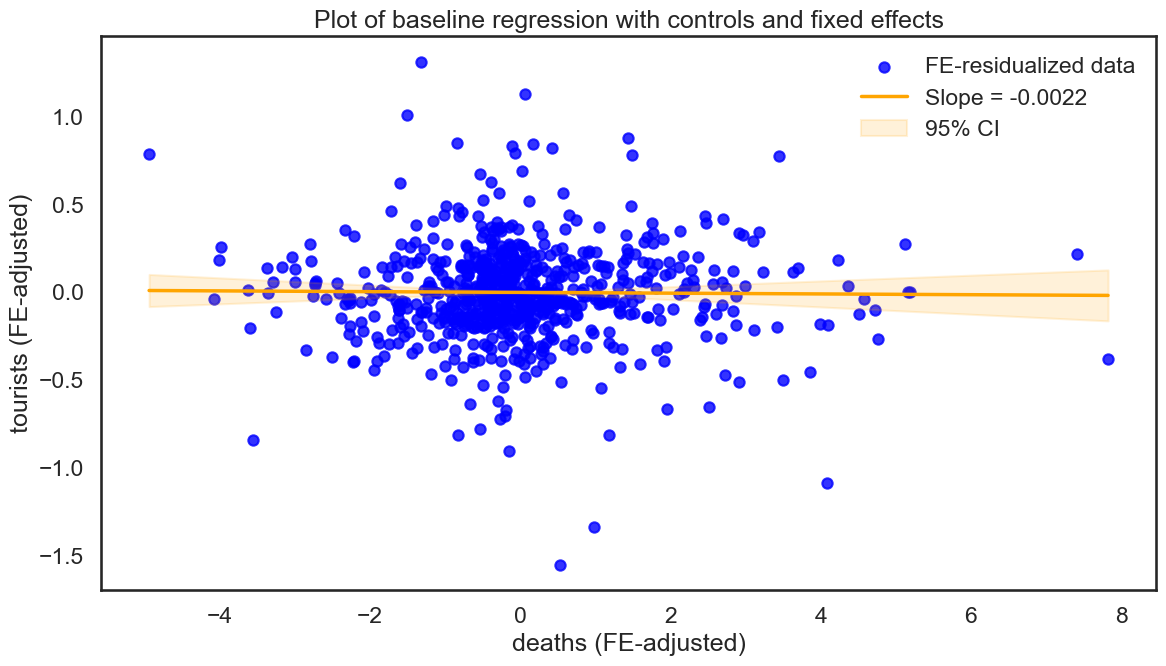

In [5]:
# Figure 7 - Plot of baseline regression with controls and fixed effects
# Run baseline regression with all controls
result_baseline = fit_panel_fe(
    df, 
    y_col='tourists', 
    x_col='deaths',
    controls=['wri_v', 'pop_density', 'gdp_pc'],
    entity_col='country',
    time_col='year'
)

# Create residualized plot
fig = plot_fe_residualized(
    df,
    y_col='tourists',
    x_col='deaths',
    entity_col='country',
    time_col='year',
    controls=['wri_v', 'pop_density', 'gdp_pc'],
    sample_frac=0.3,  # 30% sample for graph's clarity
    title="Plot of baseline regression with controls and fixed effects"
)
plt.show()


### What does this mean?
While the negative coefficient is in alignment with our initial hypothesis, the effect remains non-significant and very weak. This can be explained by the fact that, in large countries, tourists can substitute risky destinations after an event with another destination within the same country, an option that is not well-represented in our data. Similarly, the effect we are trying to study might only exist in the short-term as some countries recover faster than others (Chaulagain et al., 2020), an element that is hard to discern in yearly data.
### Check-in with robustness
Because our result is statistically non-significant, a robustness check for outliers is not technically required. This fact is reinforced by our usage of log transformation, fixed effects, and clustered standard errors. Moreover, outliers in our data represent extreme events, which are an essential part of the effect we are studying. For these reasons, we do not examine the effect of removing outliers from the model.

This said, the absence of a clear average effect based on our baseline model does not mean that disasters have no impact on tourism. Instead, it suggests that their effects may be highly uneven, depending on underlying conditions. For this reason, we board-on now for a more nuanced investigation: does the tourism response vary between countries that are less and better prepared? Let’s help you make an informed decision! 
# Prepared or Exposed? A Test of Heterogeneity
Even if tourists respond weakly to disasters on average, that average may mask important differences across destinations. A heterogeneity analysis allows us to ask whether the same disaster shock has different consequences depending on a country’s preparedness. To do so, we separate countries into two samples, less prepared and more prepared, according to the position of their preparedness index in 2001 compared to the median number for that same year. As a result, we can draw conclusions on early preparation affecting tourist activity many years down the line. We then estimate the relationship between disaster-related deaths and tourist arrivals separately for each group.
### Do we find a difference?
Once more, the results are statistically non-significant (see Appendix). We do observe that while the coefficient for less prepared countries remains negative, the coefficient for better prepared countries turns positive (Figure 8). But these results cannot be used to draw a conclusion on the benefits of preparing for natural disasters, which again suggests that the model may be suffering from lingering uncertainties or insufficient data. 


Added 'well_prepared' dummy:
  - Well-prepared countries (1): 1,178 obs
  - Not well-prepared (0): 1,197 obs
Log transformations applied (5 variables):
  - deaths -> ln(deaths+1)
  - tourists -> ln(tourists)
  - wri_v -> ln(wri_v+1)
  - pop_density -> ln(pop_density)
  - gdp_pc -> ln(gdp_pc)


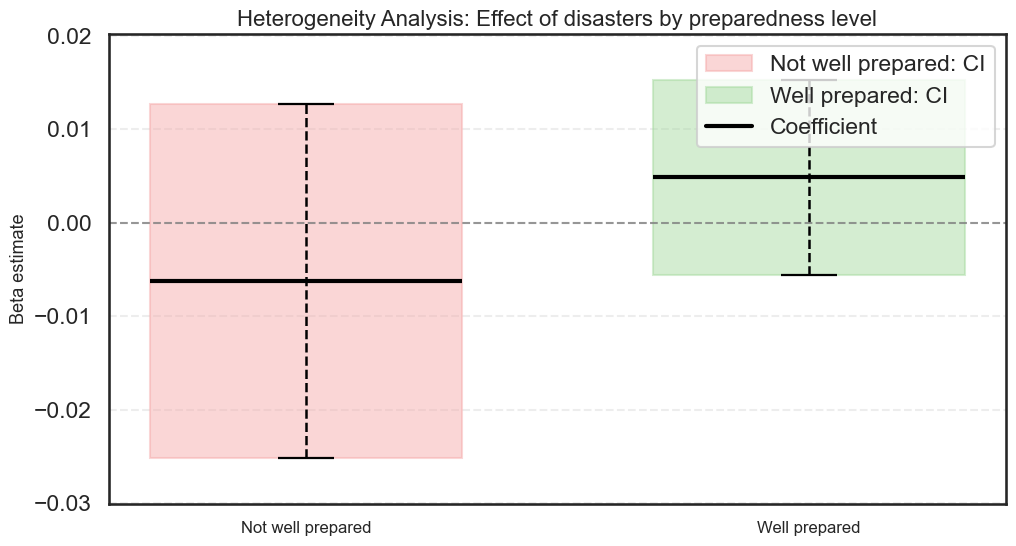


Heterogeneity Results:
  Low preparedness β: -0.006240 (SE: 0.009563)
  High preparedness β: 0.004837 (SE: 0.005271)


In [6]:
# Figure 8 - Plot of regression for heterogeneity group separated by preparedness
# IMPORTANT: Reload modules to get latest changes


# Create well_prepared dummy based on the split datasets
df_with_prep = add_well_prepared_dummy(df_all.copy(), df_low_prep)

# Apply log transformations AFTER adding the dummy
df_with_prep = log_transform_in_place(df_with_prep)

# Run heterogeneity analysis
results_het = run_heterogeneity_analysis(df_with_prep, verbose=False)

# Plot
fig = plot_heterogeneity_comparison(
    results_het['group_effects'],
    list(results_het['group_labels'].values()),
    results_het['n_clusters'],
    title="Heterogeneity Analysis: Effect of disasters by preparedness level"
)
plt.show()

print("\nHeterogeneity Results:")
beta_0, se_0 = results_het['effects']['group_0']
beta_1, se_1 = results_het['effects']['group_1']
print(f"  Low preparedness β: {beta_0:.6f} (SE: {se_0:.6f})")
print(f"  High preparedness β: {beta_1:.6f} (SE: {se_1:.6f})")

Nevertheless, the direction of our results remains informative. In better prepared countries, tourism response to deaths related to natural disasters is consistently positive. This pattern suggests that preparedness may mitigate and even reverse the perceived tourism risk associated with disaster-related human losses.

Now we’ve carefully picked our suitcase apart and are ready for take off, but what lessons have we learned?

# What The Brochure Doesn’t Tell You
Natural disasters do not make for good advertisement. However, as it is undeniable that they will become a persistent problem in the next decades, you might find yourself avoiding destinations that you would have once liked to visit. The results of this analysis do not give a clear, meaningful answer to this question, primarily because of data-specific reasons that we have extensively discussed.

Heterogeneity results, while also non-significant, have nonetheless shown that preparedness has the potential to be a differential factor between countries. Early preparation of infrastructure thus becomes a worthwhile investment instead of focusing only on recovery. While this is not currently the state of the world, we hope this research will be a map for the future of the tourism sector in future years.
# The Journey Ends, the Question Doesn’t
As our analysis revealed, our conclusions are restricted by a number of assumptions and biases specific to our dataset that might have played a role in the lack of significance of our results. A few additional concerns also remain:

- **Lingering endogeneity**: the relationship between tourism and natural disaster intensity could still be marred with endogeneity. Although we added confounders carefully and considered both the importance of their effect and their relevance in the literature, an omitted variable cannot be excluded in view of our results.

- **Different approach**: our analysis tried to diverge from existing literature analyzing the effect of natural disasters on tourism on a global dataset (Rosselo et al., 2020) by not controlling for disaster type. But in view of our results, it would be worth it to consider this approach with the other variables of our model that are missing from the literature, namely preparedness.

There is thus plenty of room to perfect our results. With a more granular dataset on the time scale, it would also be interesting to exploit the precise timing of individual disaster events to estimate tourism responses in the short-term using an event-study design. 

Moreover, there is much to be explored with regards to preparedness. Multiple factors affect the ability of a country to take preventive measures against natural disasters, including structural conditions, institutional quality, and international support. A closer look at the varying applications of the Sendai framework across countries could support this endeavor (United Nations, 2015).

Finally, a closer look at tourist composition and behavior might help draw meaningful conclusions: do all tourist categories react the same? What is the maximum time margin between the date of a disaster and a tourist’s flight for which tourists would still visit the country affected?

# So, should you be packing that first aid kit on your next holiday?

Preparedness is also about active responsibility! Do not let your perception of a country be so narrow that you ignore risks, and keep in mind that response to disasters does not look the same across the world and does make a difference. 


---

![end](assets/end.jpg)

---

This was the last plane en route to safer horizons! Enjoy your flight!

---

## REFERENCES

ABC News. (2014, December 19). In pictures: Boxing Day tsunami 10 years on. ABC. Retrieved from https://www.abc.net.au/news/2014-12-19/boxing-day-tsunami-ten-years-on/5975136

Britannica Editors (2025, December 2). Indian Ocean tsunami of 2004. Encyclopedia Britannica. https://www.britannica.com/event/Indian-Ocean-tsunami-of-2004

Centre for Research on the Epidemiology of Disasters (CRED). (n.d.). EM-DAT: The international disaster database. Université catholique de Louvain. Retrieved [date you accessed the site], from https://www.emdat.be/

Expedia Group Advertising. (2023, September 27). How travelers find destinations for their trips. Expedia Group. https://partner.expediagroup.com/en-us/resources/blog/travel-research-process-and-destination-decisions/

Food and Agriculture Organization of the United Nations. (2024). FAOSTAT population and land area data [dataset]. FAO. https://www.fao.org/faostat/

Gapminder. (2022). Population density [dataset]. Gapminder Foundation. https://www.gapminder.org/data/

Guimarães, W. P., Lenzi, M. A., & Quintanilha, J. A. (2025). Does community flood preparedness reduce mortality and injuries? Evidence from 66 flood-affected communities. Natural Hazards and Earth System Sciences, 25, 3803–3820. https://doi.org/10.5194/nhess-25-3803-2025

Jiang, X., Qin, J., Gao, J., & Gossage, M. G. (2022). How tourists' perception affects travel intention: Mechanism pathways and boundary conditions. Frontiers in Psychology, 13, Article 821364. https://doi.org/10.3389/fpsyg.2022.821364

Klein Goldewijk, K., Beusen, A., Doelman, J., & Stehfest, E. (2023). Anthropogenic land use estimates for the Holocene – HYDE 3.3 [dataset]. Utrecht University. https://doi.org/10.17026/dans-xy6-ngg6

Law, R. (2006). The perceived impact of risks on travel decisions. International Journal of Tourism Research, 8(4), 289–300. https://doi.org/10.1002/jtr.576

Moreira, P. (2007). Aftermath of crises and disasters: Notes for an impact assessment approach. In E. Laws, B. Prideaux, & K. S. Chon (Eds.), Crisis management in tourism (pp. 51–65). CABI Publishing.

Nagayama, H., & Yamada, I. (2005). A comparative analysis of earthquake mortality and medical preparedness: Lessons from California, Kobe, and Armenia. Journal of Urban Health, 82(2), 266–273. https://pubmed.ncbi.nlm.nih.gov/15596966/

Rosselló, J., Becken, S., & Santana-Gallego, M. (2020). The effects of natural disasters on international tourism: A global analysis. Tourism Management, 79, 104080. https://doi.org/10.1016/j.tourman.2020.104080

Shreve, J. B. (2025, November 25). The rise in scale and frequency of natural disasters. The End of History. https://theendofhistory.net/the-rise-in-scale-and-frequency-of-natural-disasters/

United Nations, Department of Economic and Social Affairs, Population Division. (2024). World Population Prospects 2024 [dataset]. United Nations. https://population.un.org/wpp/

United Nations General Assembly. (2015). Sendai Framework for Disaster Risk Reduction 2015–2030 (A/RES/69/283). United Nations. https://digitallibrary.un.org/record/795443?ln=en

United Nations World Tourism Organization (UNWTO). (n.d.). Tourism Statistics Database. Retrieved April 17, 2026, from https://www.untourism.int/tourism-statistics/tourism-statistics-database

Weng, J., Xiao, J., & Yu, L. (2022). Local demand, quality of place, and urban tourism competitiveness. Frontiers in Psychology, 12, Article 817805. https://doi.org/10.3389/fpsyg.2021.817805 PMCID: PMC8886880

World Bank. (1960–2024). GDP per capita, Purchasing Power Parity. Retrieved May 28, 2025, from TheGlobalEconomy.com website: https://www.theglobaleconomy.com/

World Travel & Tourism Council. (n.d.). Travel & Tourism Economic Impact Research (EIR). WTTC. Retrieved December 18, 2025, from https://wttc.org/research/economic-impact

---

## APPENDIX

### Appendix - Data Selection

*Additional details on data sources, variable definitions, and data cleaning procedures.*

![wri_v](assets/wri_v.png)

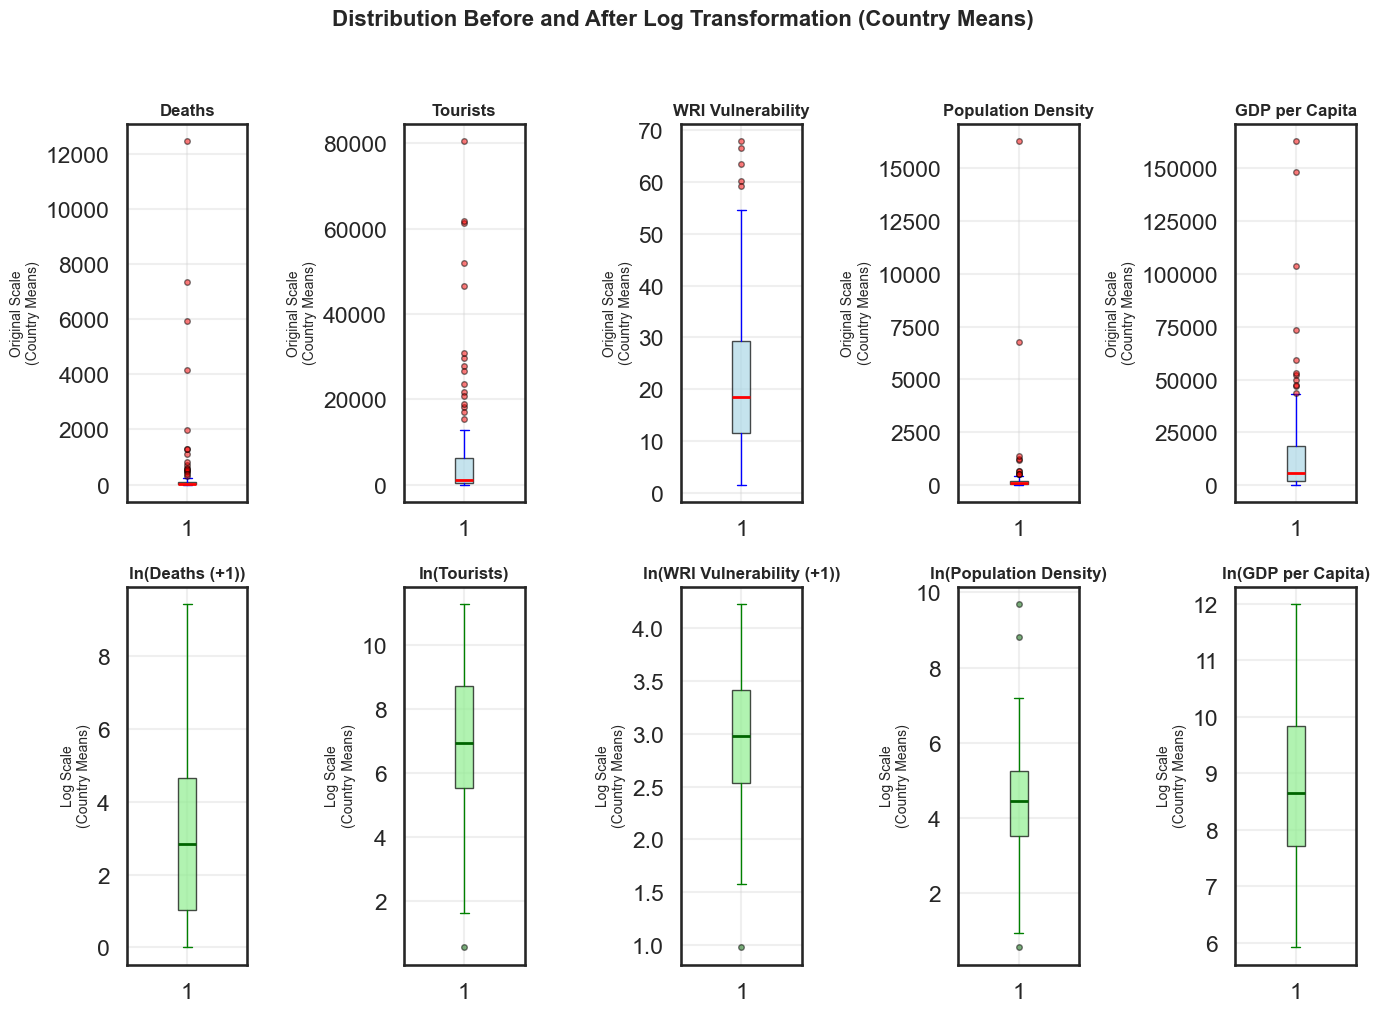

In [7]:
# Appendix: Box plots for control variable selection
fig = plot_boxplots_transformation(
    df_all,
    variables=['deaths', 'tourists', 'wri_v', 'pop_density', 'gdp_pc'],
    figsize=(14, 10)
)
plt.show()

In [8]:
# Appendix: Full regression tables
# Run all specifications
models, model_names = run_baseline_specifications(df)

# Build comprehensive table
table = build_regression_table(models, model_names)

print("\nFull Regression Table:")
print("="*80)
display_html_table(table)


Full Regression Table:


,(1) OLS: ln_tourists ~ ln_deaths,(2) FE (country+year): ln_tourists ~ ln_deaths,(3) FE (country+year) + controls: + wri_v + pop_density + gdp_pc
const,6.664747***(0.208113),,
deaths,0.192166***(0.063578),-0.006066(0.005955),-0.002559(0.006439)
gdp_pc,,,0.807847***(0.213667)
pop_density,,,0.441022*(0.243538)
wri_v,,,-0.111235**(0.054351)
N,2375,2375,2375
# Countries,,125,125
# Years,,19,19
R² (OLS) / R² within (FE),0.041844,0.000872,0.127432
Country FE,No,Yes,Yes


In [9]:
# Appendix: Tableau de régression avec ajout progressif des contrôles
from linearmodels.panel import PanelOLS
from IPython.display import HTML, display

# Utiliser les données déjà chargées et transformées
# df est déjà défini dans la cellule 3 avec les transformations log
data = df.copy().set_index(['country', 'year'])

# Régression 1: ln(tourists) vs ln(deaths+1) + FE country and time
model1 = PanelOLS(
    data['tourists'],
    data[['deaths']],
    entity_effects=True,
    time_effects=True
)
result1 = model1.fit(cov_type='clustered', cluster_entity=True)

# Régression 2: + ln(wri_v)
model2 = PanelOLS(
    data['tourists'],
    data[['deaths', 'wri_v']],
    entity_effects=True,
    time_effects=True
)
result2 = model2.fit(cov_type='clustered', cluster_entity=True)

# Régression 3: + ln(pop_density)
model3 = PanelOLS(
    data['tourists'],
    data[['deaths', 'wri_v', 'pop_density']],
    entity_effects=True,
    time_effects=True
)
result3 = model3.fit(cov_type='clustered', cluster_entity=True)

# Régression 4: + ln(gdp_pc)
model4 = PanelOLS(
    data['tourists'],
    data[['deaths', 'wri_v', 'pop_density', 'gdp_pc']],
    entity_effects=True,
    time_effects=True
)
result4 = model4.fit(cov_type='clustered', cluster_entity=True)

# Construire le tableau HTML
results = [result1, result2, result3, result4]
model_names = [
    'Model 1<br>FE only',
    'Model 2<br>+ ln(wri_v)',
    'Model 3<br>+ ln(pop_density)',
    'Model 4<br>+ ln(gdp_pc)'
]

# Créer le tableau HTML
html = """
<style>
    .regression-table {
        border-collapse: collapse;
        width: 100%;
        margin: 20px 0;
        font-family: Arial, sans-serif;
        font-size: 14px;
    }
    .regression-table th {
        background-color: #2c3e50;
        color: white;
        padding: 12px;
        text-align: center;
        border: 1px solid #34495e;
    }
    .regression-table td {
        padding: 10px;
        text-align: center;
        border: 1px solid #ddd;
    }
    .regression-table tr:nth-child(even) {
        background-color: #f8f9fa;
    }
    .regression-table tr:hover {
        background-color: #e9ecef;
    }
    .var-name {
        text-align: left;
        font-weight: bold;
        padding-left: 20px !important;
    }
    .se {
        font-size: 12px;
        color: #666;
    }
    .stats-row {
        background-color: #ecf0f1 !important;
        font-style: italic;
    }
</style>

<table class="regression-table">
    <thead>
        <tr>
            <th>Variable</th>
"""

for name in model_names:
    html += f"            <th>{name}</th>\n"

html += """        </tr>
    </thead>
    <tbody>
"""

# Ajouter les coefficients
variables = ['deaths', 'wri_v', 'pop_density', 'gdp_pc']
var_labels = {
    'deaths': 'ln(deaths+1)',
    'wri_v': 'ln(wri_v+1)',
    'pop_density': 'ln(pop_density)',
    'gdp_pc': 'ln(gdp_pc)'
}

for var in variables:
    html += f'        <tr>\n            <td class="var-name">{var_labels[var]}</td>\n'
    
    for result in results:
        if var in result.params.index:
            coef = result.params[var]
            se = result.std_errors[var]
            pval = result.pvalues[var]
            
            # Ajouter des étoiles de significativité
            stars = ''
            if pval < 0.01:
                stars = '***'
            elif pval < 0.05:
                stars = '**'
            elif pval < 0.1:
                stars = '*'
            
            html += f'            <td>{coef:.6f}{stars}<br><span class="se">({se:.6f})</span></td>\n'
        else:
            html += '            <td>—</td>\n'
    
    html += '        </tr>\n'

# Ajouter les statistiques
html += '        <tr class="stats-row">\n            <td class="var-name">R²</td>\n'
for result in results:
    html += f'            <td>{result.rsquared:.4f}</td>\n'
html += '        </tr>\n'

html += '        <tr class="stats-row">\n            <td class="var-name">N observations</td>\n'
for result in results:
    html += f'            <td>{result.nobs:.0f}</td>\n'
html += '        </tr>\n'

html += '        <tr class="stats-row">\n            <td class="var-name">Country FE</td>\n'
for _ in results:
    html += '            <td>✓</td>\n'
html += '        </tr>\n'

html += '        <tr class="stats-row">\n            <td class="var-name">Time FE</td>\n'
for _ in results:
    html += '            <td>✓</td>\n'
html += '        </tr>\n'

html += """    </tbody>
</table>

<p style="font-size: 12px; color: #666; margin-top: 10px;">
    <strong>Note:</strong> Standard errors in parentheses, clustered at country level.<br>
    Significance levels: * p&lt;0.1, ** p&lt;0.05, *** p&lt;0.01
</p>
"""

display(HTML(html))

Variable,Model 1FE only,Model 2+ ln(wri_v),Model 3+ ln(pop_density),Model 4+ ln(gdp_pc)
ln(deaths+1),-0.006066(0.005955),-0.003748(0.006134),-0.003063(0.006022),-0.002559(0.006439)
ln(wri_v+1),—,-0.174814***(0.065305),-0.172519***(0.064877),-0.111235**(0.054351)
ln(pop_density),—,—,0.282899(0.261758),0.441022*(0.243538)
ln(gdp_pc),—,—,—,0.807847***(0.213667)
R²,0.0009,0.0129,0.0174,0.1274
N observations,2375,2375,2375,2375
Country FE,✓,✓,✓,✓
Time FE,✓,✓,✓,✓


### Appendix - Heterogeneity

*Additional heterogeneity analysis tables and figures.*

In [10]:
# Appendix: Tableau de régression pour l'analyse d'hétérogénéité
from IPython.display import HTML, display
import pandas as pd

# Vérifier et charger les données si nécessaire
try:
    # Essayer d'utiliser df_with_prep qui devrait être défini dans la cellule 18
    test = df_with_prep.shape
    print("✓ Données 'df_with_prep' trouvées")
except NameError:
    print("⚠️ Variable 'df_with_prep' non trouvée. Chargement des données...")
    from src import *
    df_all, df_low_prep, df_high_prep = load_all_datasets()
    df_with_prep = add_well_prepared_dummy(df_all.copy(), df_low_prep, verbose=False)
    df_with_prep = log_transform_in_place(df_with_prep, verbose=False)
    print("✓ Données chargées avec succès")

# Exécuter l'analyse d'hétérogénéité complète avec tous les contrôles et FE
print("\n🔄 Exécution de l'analyse d'hétérogénéité...")
results_het_table = run_heterogeneity_analysis(
    df_with_prep,
    y_col='tourists',
    x_col='deaths',
    interaction_var='well_prepared',
    entity_col='country',
    time_col='year',
    controls=['wri_v', 'pop_density', 'gdp_pc'],
    verbose=False
)

# Extraire le résultat de la régression
result = results_het_table['result']

# Créer un tableau HTML formaté
html = """
<style>
    .het-table {
        border-collapse: collapse;
        width: 100%;
        margin: 20px 0;
        font-family: Arial, sans-serif;
        font-size: 14px;
    }
    .het-table th {
        background-color: #34495e;
        color: white;
        padding: 12px;
        text-align: center;
        border: 1px solid #2c3e50;
    }
    .het-table td {
        padding: 10px;
        text-align: center;
        border: 1px solid #ddd;
    }
    .het-table tr:nth-child(even) {
        background-color: #f8f9fa;
    }
    .het-table tr:hover {
        background-color: #e9ecef;
    }
    .var-name-het {
        text-align: left;
        font-weight: bold;
        padding-left: 20px !important;
    }
    .se-het {
        font-size: 12px;
        color: #666;
    }
    .stats-row-het {
        background-color: #d5dbdb !important;
        font-style: italic;
    }
    .title-het {
        font-size: 18px;
        font-weight: bold;
        margin: 20px 0 10px 0;
        color: #2c3e50;
    }
</style>

<div class="title-het">Heterogeneity Analysis: Effect of Natural Disasters on Tourism by Preparedness Level</div>

<table class="het-table">
    <thead>
        <tr>
            <th>Variable</th>
            <th>Coefficient</th>
        </tr>
    </thead>
    <tbody>
"""

# Variables à afficher
var_labels = {
    'deaths': 'ln(deaths+1)',
    'deaths_x_well_prepared': 'ln(deaths+1) × Well Prepared',
    'wri_v': 'ln(wri_v+1)',
    'pop_density': 'ln(pop_density)',
    'gdp_pc': 'ln(gdp_pc)'
}

# Ajouter les coefficients
for var, label in var_labels.items():
    if var in result.params.index:
        coef = result.params[var]
        se = result.std_errors[var]
        pval = result.pvalues[var]
        
        # Étoiles de significativité
        stars = ''
        if pval < 0.01:
            stars = '***'
        elif pval < 0.05:
            stars = '**'
        elif pval < 0.1:
            stars = '*'
        
        html += f"""        <tr>
            <td class="var-name-het">{label}</td>
            <td>{coef:.6f}{stars}<br><span class="se-het">({se:.6f})</span></td>
        </tr>
"""

# Ajouter les statistiques
html += f"""        <tr class="stats-row-het">
            <td class="var-name-het">R² (within)</td>
            <td>{result.rsquared_within:.4f}</td>
        </tr>
        <tr class="stats-row-het">
            <td class="var-name-het">N observations</td>
            <td>{result.nobs:.0f}</td>
        </tr>
        <tr class="stats-row-het">
            <td class="var-name-het">N countries</td>
            <td>{result.model.dependent.index.get_level_values(0).nunique()}</td>
        </tr>
        <tr class="stats-row-het">
            <td class="var-name-het">Country FE</td>
            <td>✓</td>
        </tr>
        <tr class="stats-row-het">
            <td class="var-name-het">Time FE</td>
            <td>✓</td>
        </tr>
    </tbody>
</table>

<p style="font-size: 12px; color: #666; margin-top: 10px;">
    <strong>Note:</strong> Standard errors in parentheses, clustered at country level.<br>
    Significance levels: * p&lt;0.1, ** p&lt;0.05, *** p&lt;0.01<br>
    <strong>Model:</strong> ln(tourists) = β₀·ln(deaths+1) + β₁·ln(deaths+1)×WellPrepared + Controls + Country FE + Time FE
</p>
"""

# Ajouter les effets marginaux par groupe
beta_0, se_0 = results_het_table['effects']['group_0']
beta_1, se_1 = results_het_table['effects']['group_1']

html += f"""
<div class="title-het" style="margin-top: 30px;">Marginal Effects by Preparedness Group</div>

<table class="het-table">
    <thead>
        <tr>
            <th>Group</th>
            <th>Effect of ln(deaths+1)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="var-name-het">Not Well Prepared (Group 0)</td>
            <td>{beta_0:.6f}<br><span class="se-het">({se_0:.6f})</span></td>
        </tr>
        <tr>
            <td class="var-name-het">Well Prepared (Group 1)</td>
            <td>{beta_1:.6f}<br><span class="se-het">({se_1:.6f})</span></td>
        </tr>
        <tr class="stats-row-het">
            <td class="var-name-het">Difference (Group 1 - Group 0)</td>
            <td>{beta_1 - beta_0:.6f}</td>
        </tr>
    </tbody>
</table>

<p style="font-size: 12px; color: #666; margin-top: 10px;">
    <strong>Interpretation:</strong> The marginal effect shows how a 1% increase in disaster deaths affects tourism for each preparedness group.<br>
    A negative coefficient indicates that more deaths reduce tourism, while a positive coefficient suggests resilience.
</p>
"""

display(HTML(html))
print("\n✅ Tableau d'hétérogénéité généré avec succès!")

✓ Données 'df_with_prep' trouvées

🔄 Exécution de l'analyse d'hétérogénéité...


Variable,Coefficient
ln(deaths+1),-0.006240(0.009563)
ln(deaths+1) × Well Prepared,0.011077(0.011383)
ln(wri_v+1),-0.111724**(0.054276)
ln(pop_density),0.433922*(0.243523)
ln(gdp_pc),0.804993***(0.214295)
R² (within),0.4309
N observations,2375
N countries,125
Country FE,✓
Time FE,✓



✅ Tableau d'hétérogénéité généré avec succès!
